In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
# plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'serif',
          'axes.titlesize' : 24,
'axes.labelsize' : 20,
'lines.linewidth' : 2,
'lines.markersize' : 10,
'xtick.labelsize' : 16,
'ytick.labelsize' : 16,
          }
plt.rcParams.update(params) 
%config InlineBackend.figure_formats=['pdf', 'retina']
%matplotlib inline

In [3]:
# Test the figure gen

from tensorboard.backend.event_processing import event_accumulator

In [10]:
import os

entry_path = "logs/" + "default_" + "sphere_bignoise_vertex3"
event_file = os.path.join(entry_path, os.listdir(entry_path)[0])

In [5]:
ea = event_accumulator.EventAccumulator(event_file)

In [6]:
ea.Reload()
ea.Tags()

{'images': [],
 'audio': [],
 'histograms': [],
 'scalars': ['optimizer/loss', 'optimizer/lambda'],
 'distributions': [],
 'tensors': [],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

In [9]:
loss_1 = np.fromiter(map(lambda x: x.value, ea.Scalars('optimizer/loss')), np.float)
ea.Scalars('optimizer/loss')

[ScalarEvent(wall_time=1594172845.9700422, step=0, value=91814984.0),
 ScalarEvent(wall_time=1594172847.321888, step=1, value=87305320.0),
 ScalarEvent(wall_time=1594172847.7436302, step=2, value=87114040.0),
 ScalarEvent(wall_time=1594172847.980831, step=3, value=86708976.0),
 ScalarEvent(wall_time=1594172848.202154, step=4, value=86237592.0),
 ScalarEvent(wall_time=1594172848.5973241, step=4, value=86237592.0)]

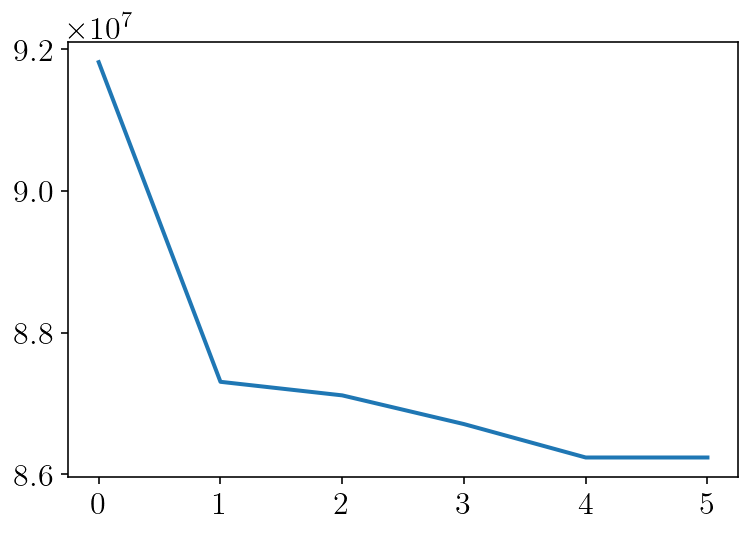

In [10]:
plt.plot(loss_1)

In [4]:
def plot_curve(ax, prefix, entry='optimizer/loss', logpath="logs/", dataset="sphere_bignoise_vertex3", legend=None, marker="", xaxis="time"):
    entry_path = os.path.join(logpath, prefix + "_" + dataset)
    event_file = os.path.join(entry_path, os.listdir(entry_path)[0])
    ea = event_accumulator.EventAccumulator(event_file)
    ea.Reload()
    values = ea.Scalars(entry)
    loss = np.fromiter(map(lambda x: x.value, values), np.float)
    if xaxis == 'time':
        x = np.fromiter(map(lambda x: x.wall_time, values), np.float)
        x0 = x[0]
        x = x - x0
    else:
        x = np.fromiter(map(lambda x: x.step, values), np.int)
    if not legend is None:
        ax.plot(x, loss, label=legend, alpha=0.7, marker=marker)
    else:
        ax.plot(x, loss, marker=marker)

In [8]:
datasets = ["rim", "cubicle", "grid3D", "torus3D", "parking-garage", "sphere_bignoise_vertex3"]
dataset_names = { "rim": "Rim", "cubicle": "Cubicle", "grid3D": "Grid3D", "torus3D": "Torus3D", "parking-garage": "Garage", "sphere_bignoise_vertex3": "Sphere" }
prefixes = ["default", "quat", "rot3", "full"]
labels = { "default": "Cayley", "quat": "Quaternion", "rot3": "Full Rot3", "full": "Full Pose3" }
#markers = { "default": "", "quat": "o", "rot3": "", "full": "" }
markers = { "default": "1", "quat": "2", "rot3": "+", "full": "4" }

def plot_dataset(ax, dataset, init=False):
    for p in prefixes:
        prefix = p
        if init:
            prefix = prefix + "_init"
        plot_curve(ax, prefix, legend=labels[p], marker=markers[p], dataset=dataset)

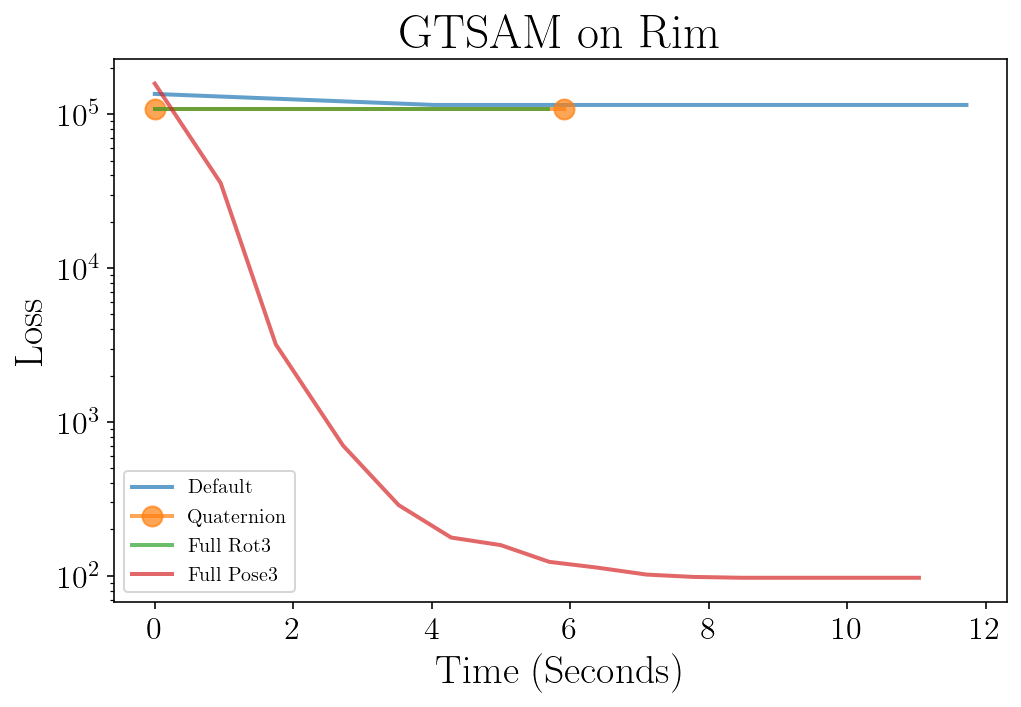

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
plot_dataset(ax, datasets[0])
ax.set_yscale("log")
ax.legend()
ax.set_title("GTSAM on Rim")
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("Loss");

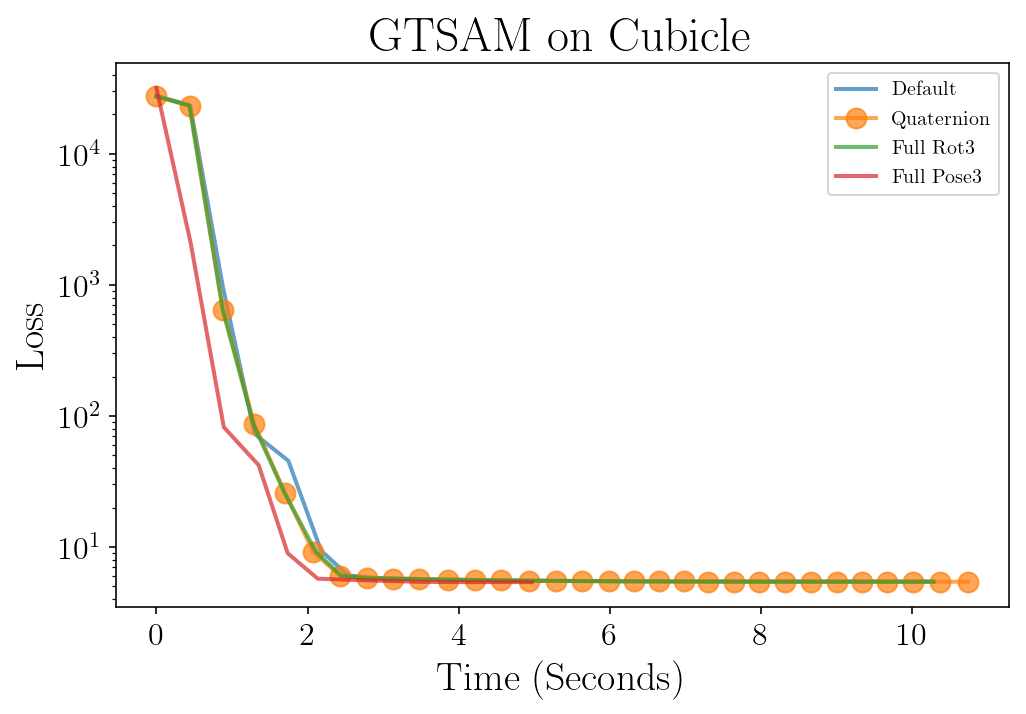

In [11]:
fig, ax = plt.subplots(figsize=(8,5))
plot_dataset(ax, datasets[1])
ax.set_yscale("log")
ax.legend()
ax.set_title("GTSAM on Cubicle")
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("Loss");

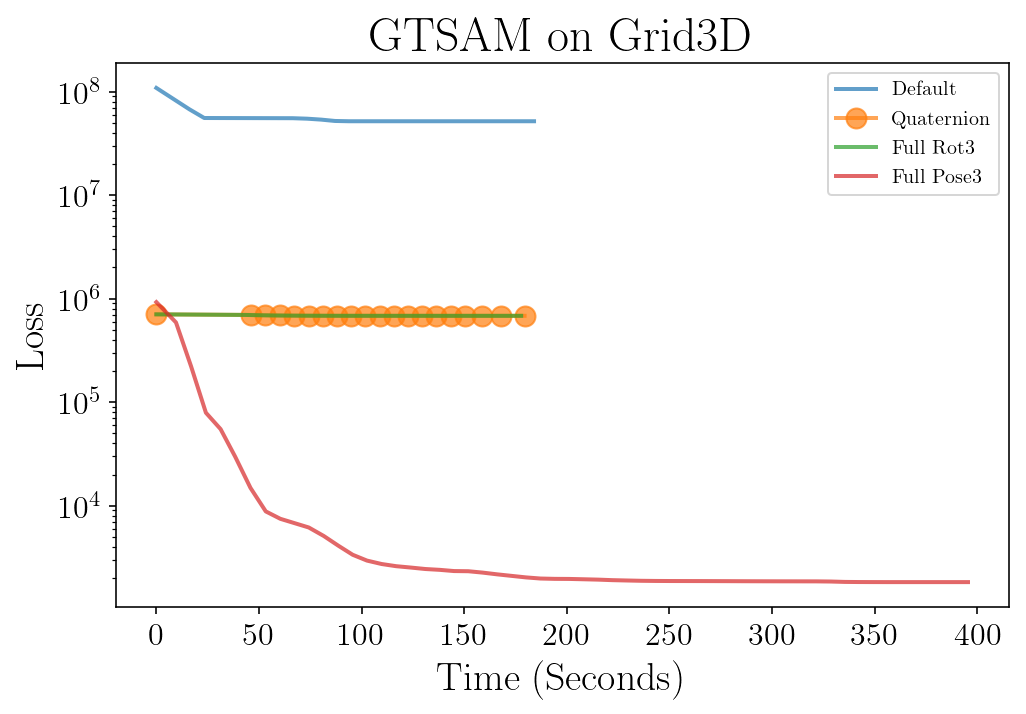

In [12]:
fig, ax = plt.subplots(figsize=(8,5))
plot_dataset(ax, datasets[2])
ax.set_yscale("log")
ax.legend()
ax.set_title("GTSAM on Grid3D")
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("Loss");

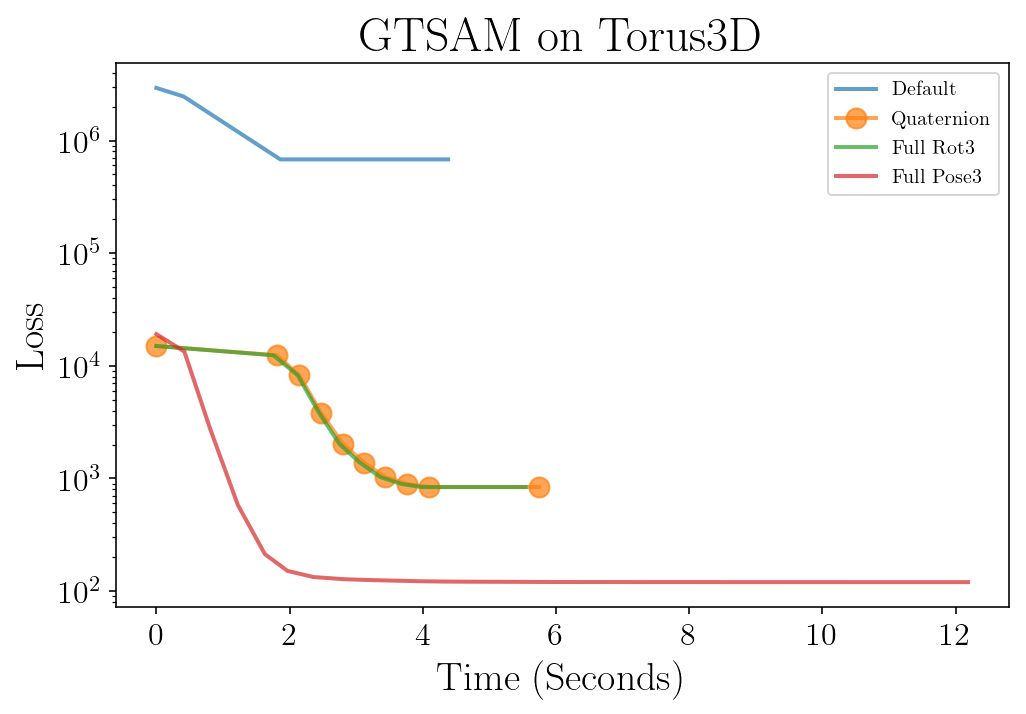

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
plot_dataset(ax, datasets[3])
ax.set_yscale("log")
ax.legend()
ax.set_title("GTSAM on Torus3D")
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("Loss");

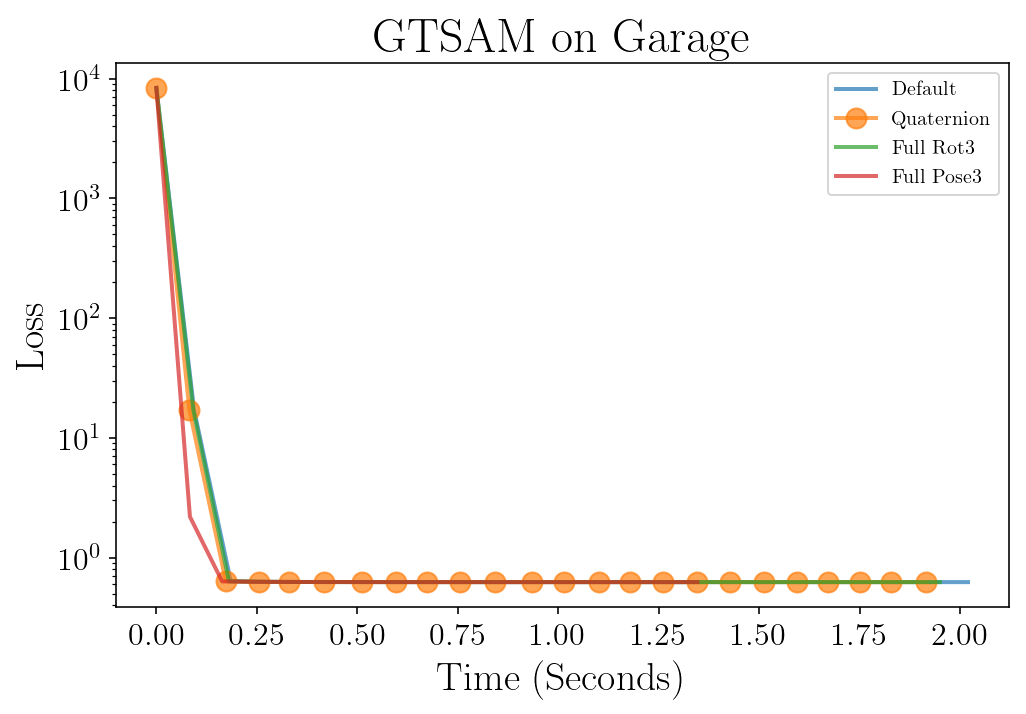

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
plot_dataset(ax, datasets[4])
ax.set_yscale("log")
ax.legend()
ax.set_title("GTSAM on Garage")
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("Loss");

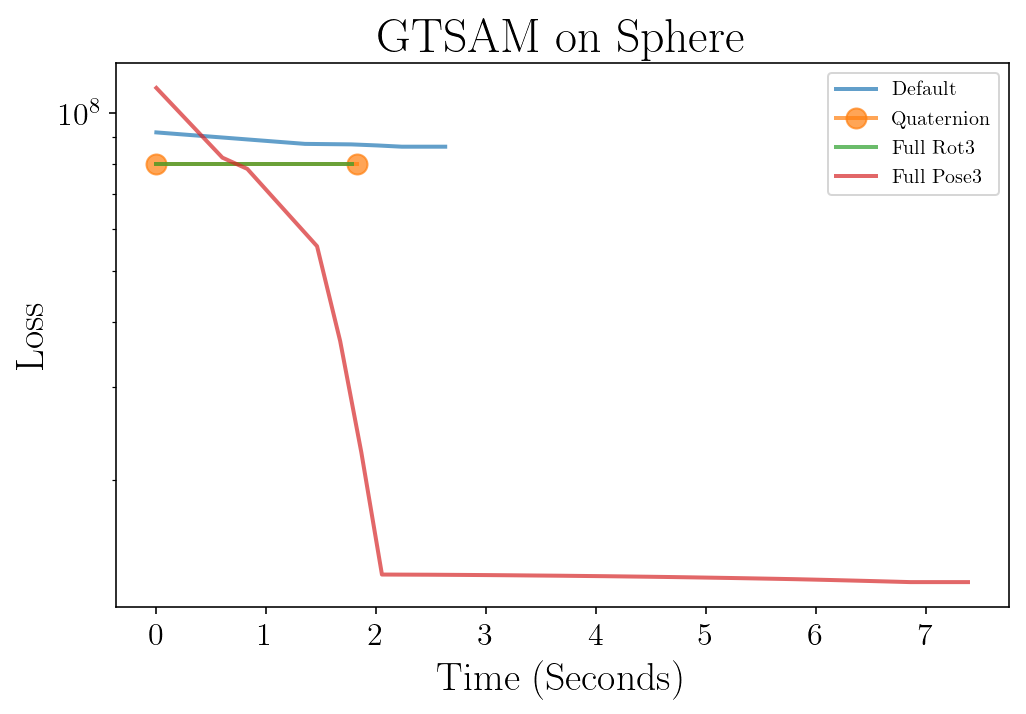

In [15]:
fig, ax = plt.subplots(figsize=(8,5))
plot_dataset(ax, datasets[5])
ax.set_yscale("log")
ax.legend()
ax.set_title("GTSAM on Sphere")
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("Loss");

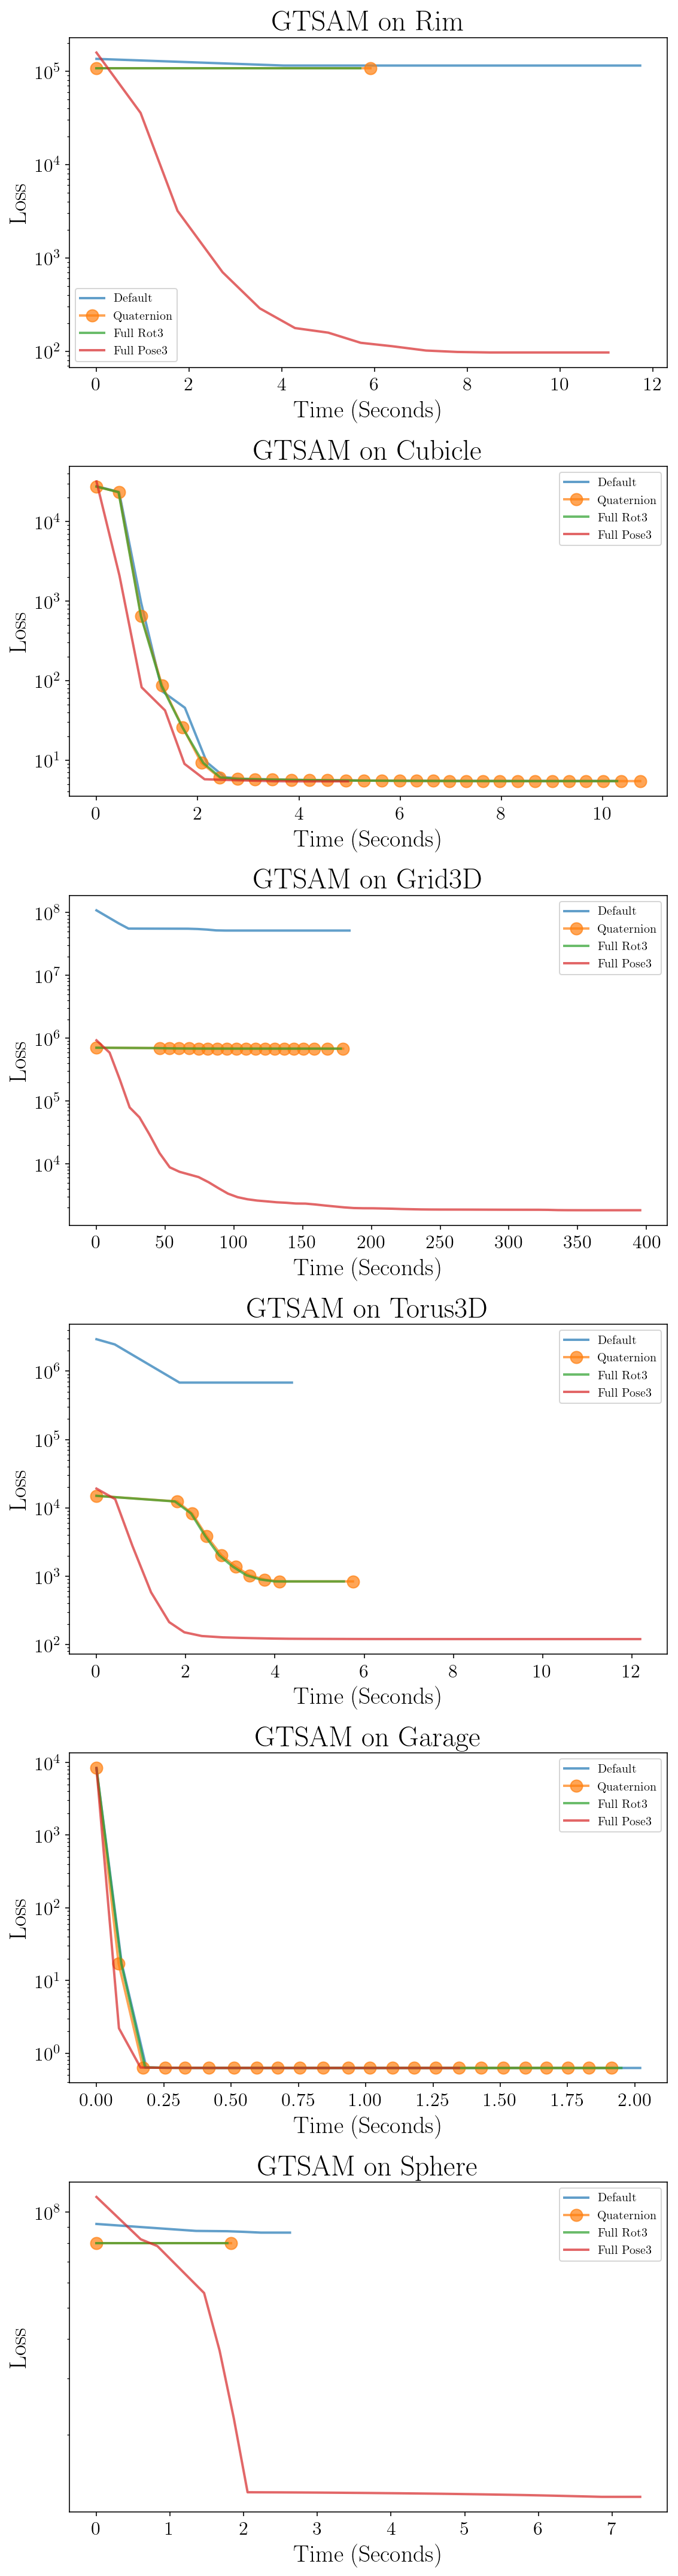

In [11]:
fig, axs = plt.subplots(6, figsize=(8, 30))

for i in range(6):
    ax = axs[i]
    plot_dataset(ax, datasets[i])
    ax.set_yscale("log")
    ax.legend()
    ax.set_title("GTSAM on " + dataset_names[datasets[i]])
    ax.set_xlabel("Time (Seconds)")
    ax.set_ylabel("Loss");

fig.tight_layout()

# Chordal

In [7]:
datasets = ["rim", "cubicle", "grid3D", "torus3D", "parking-garage", "sphere_bignoise_vertex3"]

prefixes = ["default", "quat", "rot3", "full"]

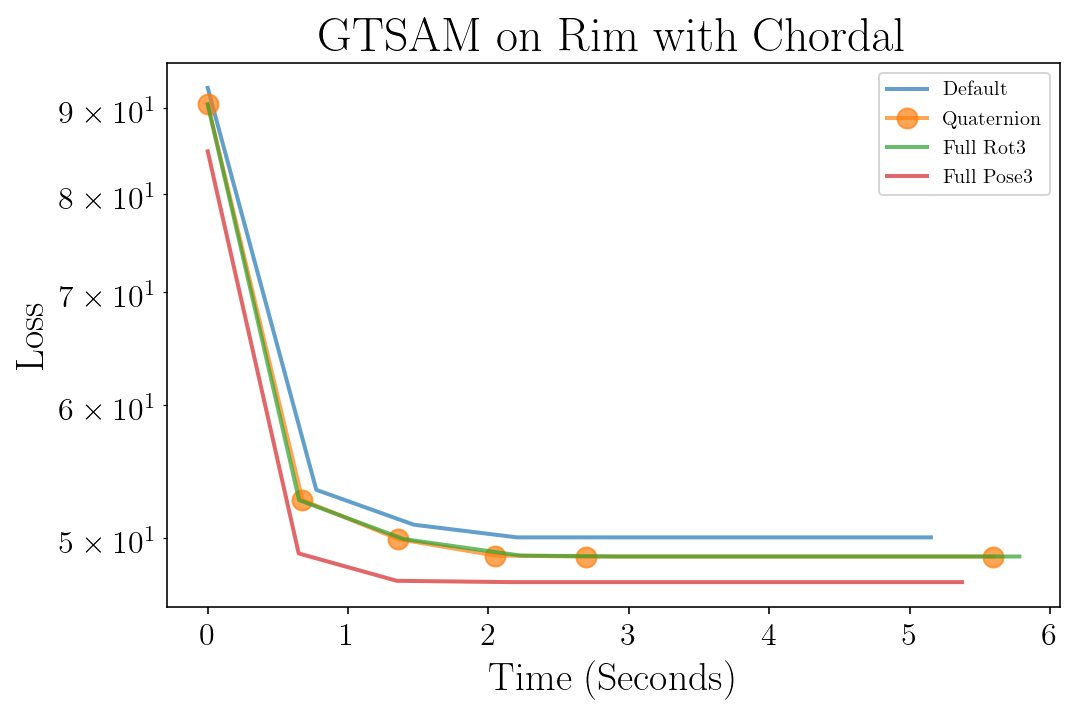

In [18]:
fig, ax = plt.subplots(figsize=(8,5))
plot_dataset(ax, datasets[0], init=True)
ax.set_yscale("log")
ax.legend()
ax.set_title("GTSAM on Rim with Chordal")
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("Loss");

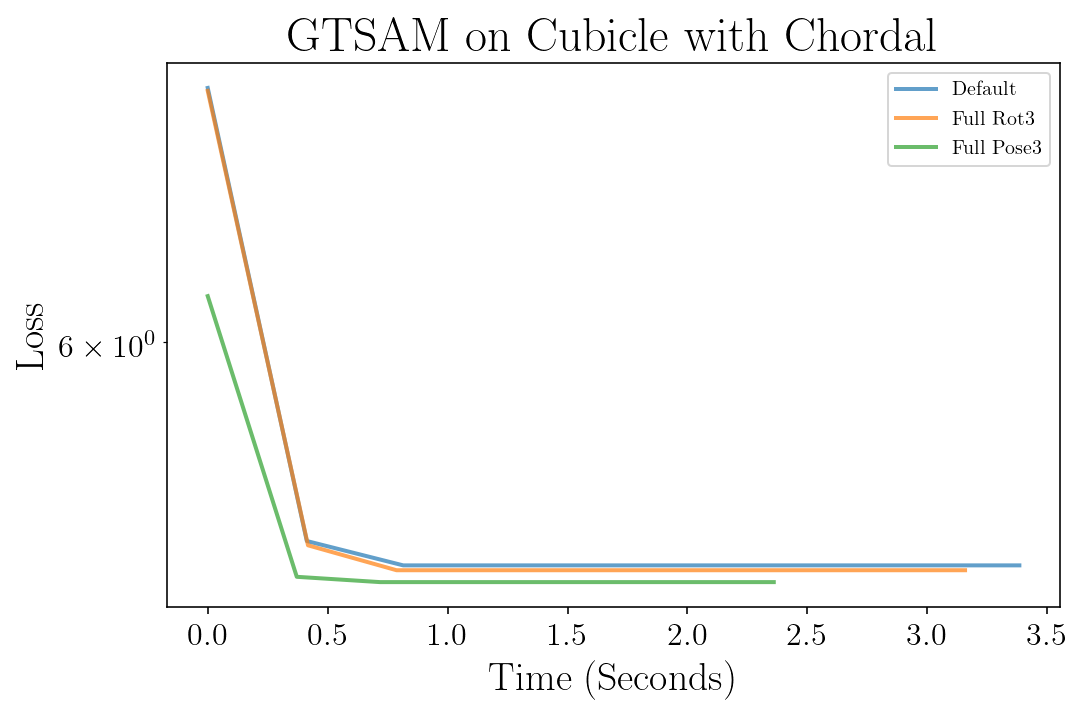

In [39]:
fig, ax = plt.subplots(figsize=(8,5))
plot_dataset(ax, datasets[1], init=True)
ax.set_yscale("log")
ax.legend()
ax.set_title("GTSAM on Cubicle with Chordal")
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("Loss");

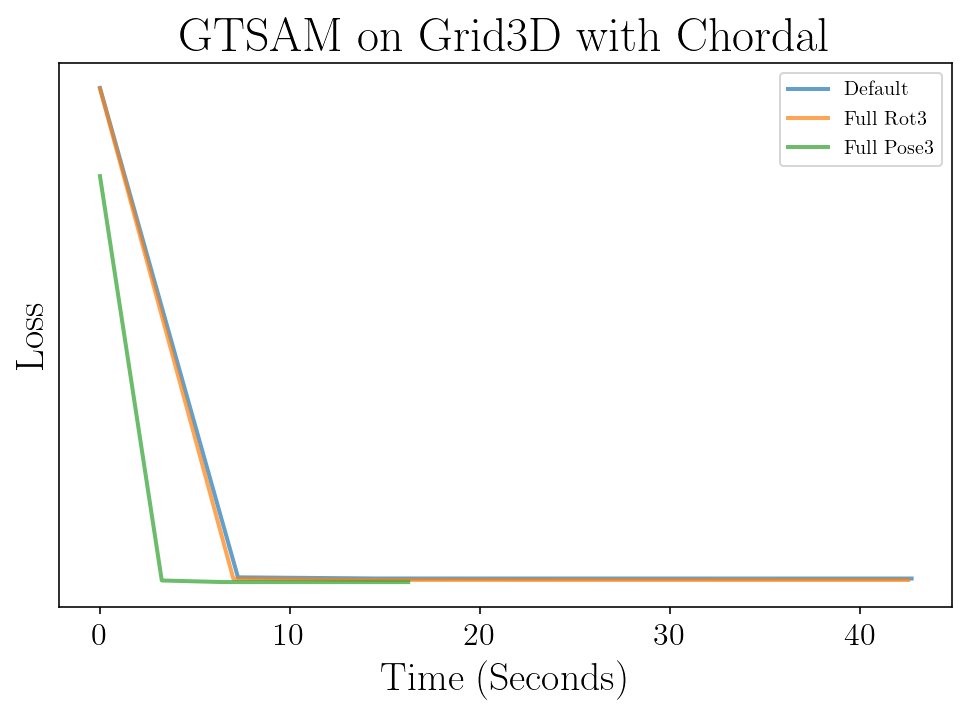

In [40]:
fig, ax = plt.subplots(figsize=(8,5))
plot_dataset(ax, datasets[2], init=True)
ax.set_yscale("log")
ax.legend()
ax.set_title("GTSAM on Grid3D with Chordal")
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("Loss");

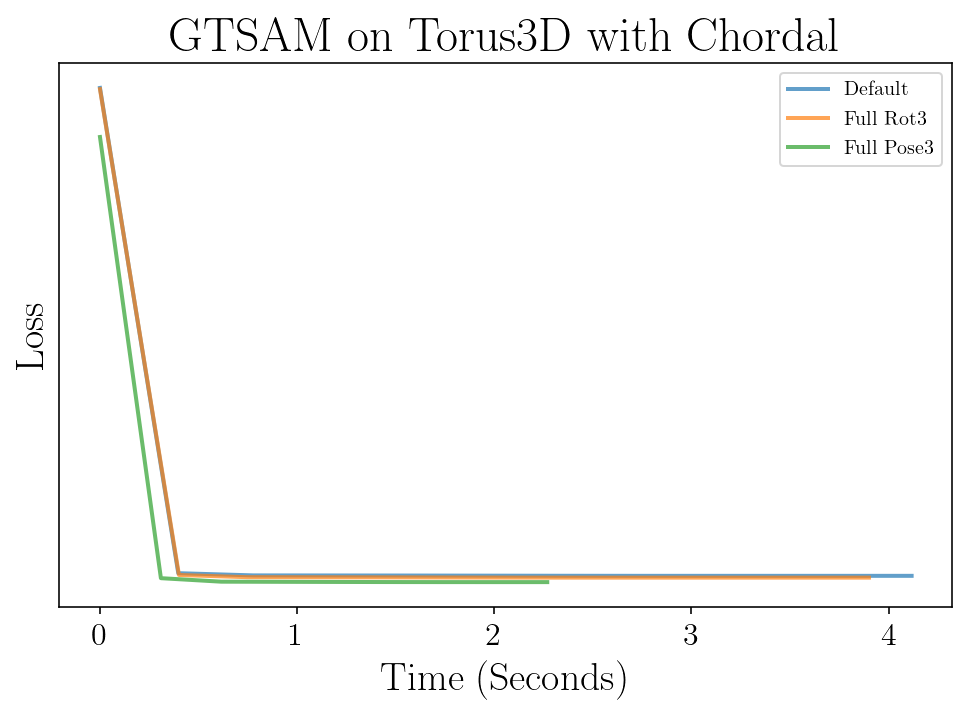

In [41]:
fig, ax = plt.subplots(figsize=(8,5))
plot_dataset(ax, datasets[3], init=True)
ax.set_yscale("log")
ax.legend()
ax.set_title("GTSAM on Torus3D with Chordal")
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("Loss");

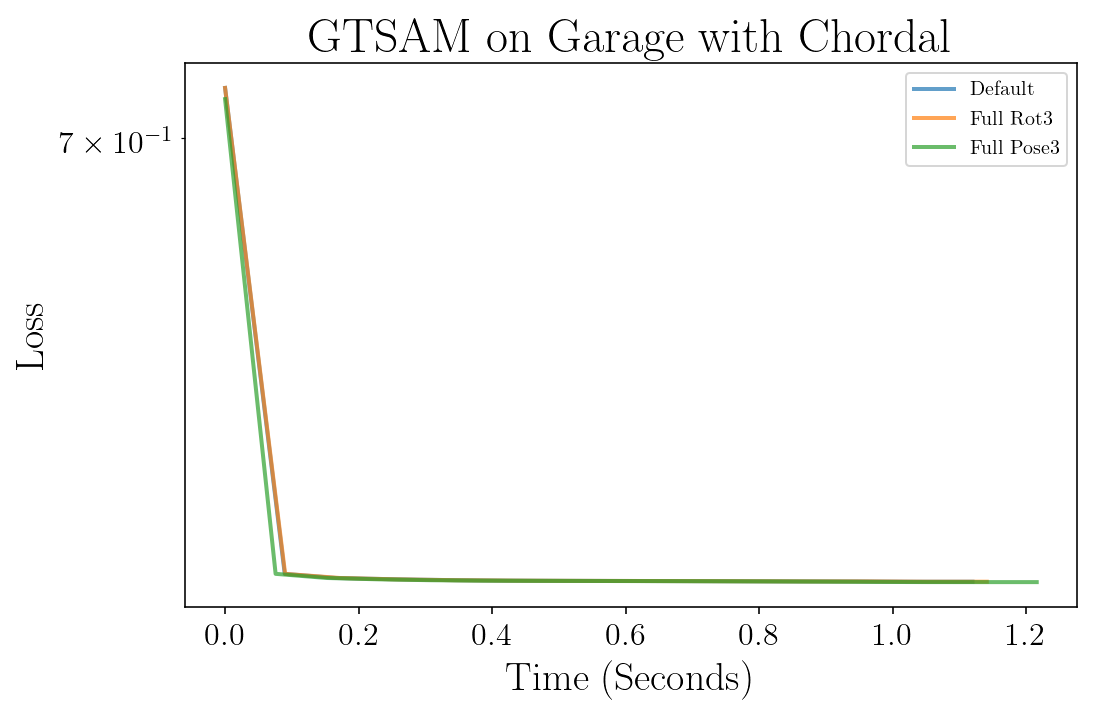

In [42]:
fig, ax = plt.subplots(figsize=(8,5))
plot_dataset(ax, datasets[4], init=True)
ax.set_yscale("log")
ax.legend()
ax.set_title("GTSAM on Garage with Chordal")
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("Loss");

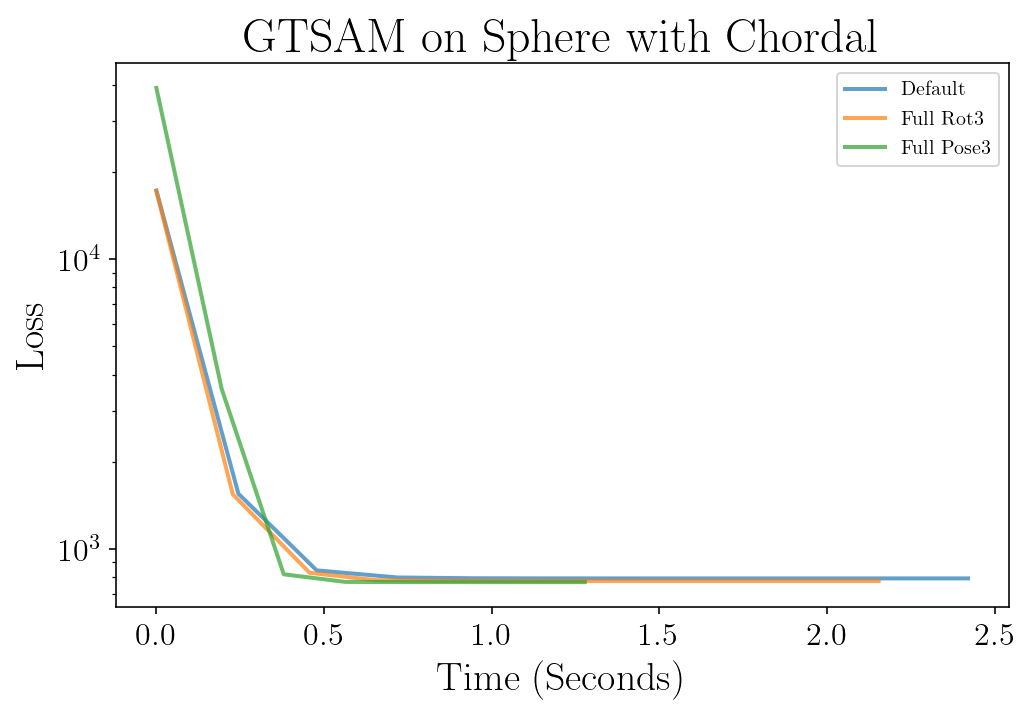

In [43]:
fig, ax = plt.subplots(figsize=(8,5))
plot_dataset(ax, datasets[5], init=True)
ax.set_yscale("log")
ax.legend()
ax.set_title("GTSAM on Sphere with Chordal")
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("Loss");

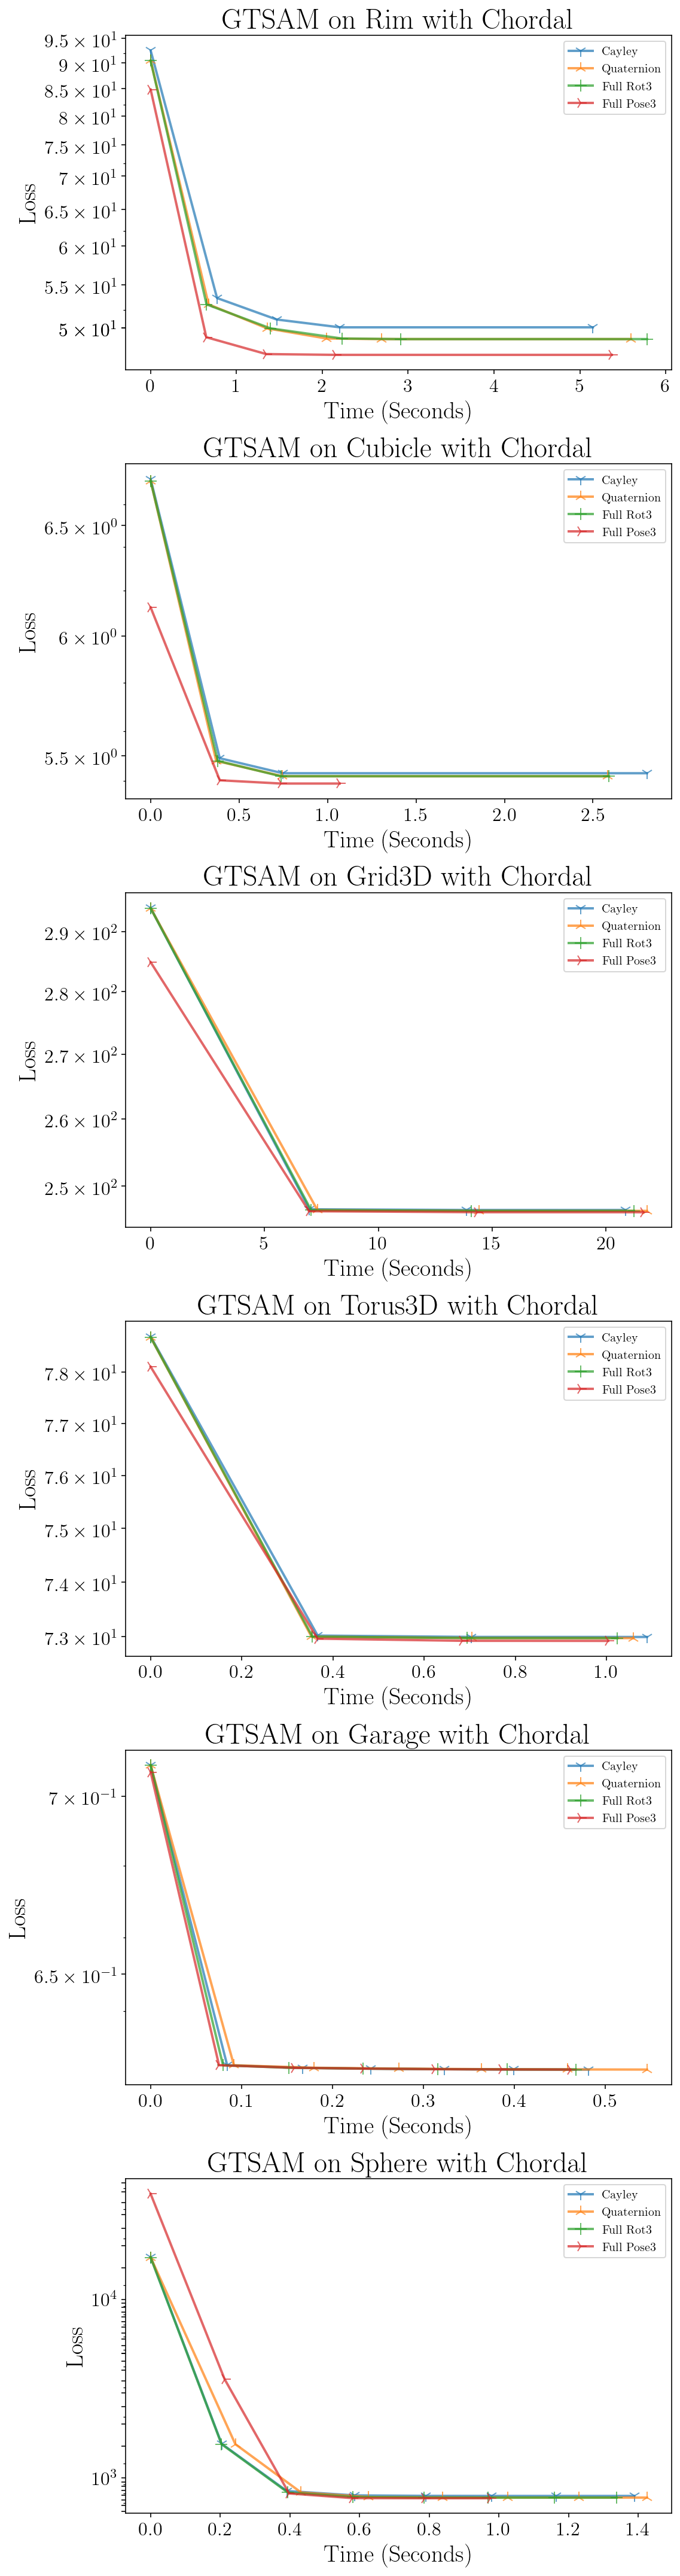

In [13]:
fig, axs = plt.subplots(6, figsize=(8, 30))

for i in range(6):
    ax = axs[i]
    plot_dataset(ax, datasets[i], init=True)
    ax.set_yscale("log")
    ax.legend()
    ax.set_title("GTSAM on " + dataset_names[datasets[i]] + " with Chordal")
    ax.set_xlabel("Time (Seconds)")
    ax.yaxis.set_major_locator(matplotlib.ticker.LogLocator(base=10, numdecs=3, subs=np.arange(0, 10, 0.5)))
    ax.yaxis.set_minor_locator(matplotlib.ticker.LogLocator(base=10, numdecs=0, subs=np.arange(0, 10, 1) + 0.2))
    ax.yaxis.set_minor_formatter(matplotlib.ticker.FormatStrFormatter(""))
    ax.set_ylabel("Loss");

fig.tight_layout()
fig.savefig("chordal_convergence.pdf")
fig.savefig("chordal_convergence.png",dpi=300)

# SwiftFusion

In [16]:
datasets = ["rim", "cubicle", "grid3D", "torus3D", "parking-garage", "sphere_bignoise_vertex3"]

prefixes = ["sf_btw", "sf_init", "full_cg", "full_init_cg"]
labels = { "sf_btw": "SwiftFusion", "sf_chor": "Frobenius", "sf_init": "SwiftFusion+Chordal", "full_cg": "GTSAM", "full_init_cg": "GTSAM+Chordal" }
markers = { "sf_btw": "o", "sf_chor": "o", "sf_init": "o", "full_cg": "o", "full_init_cg": "o"}

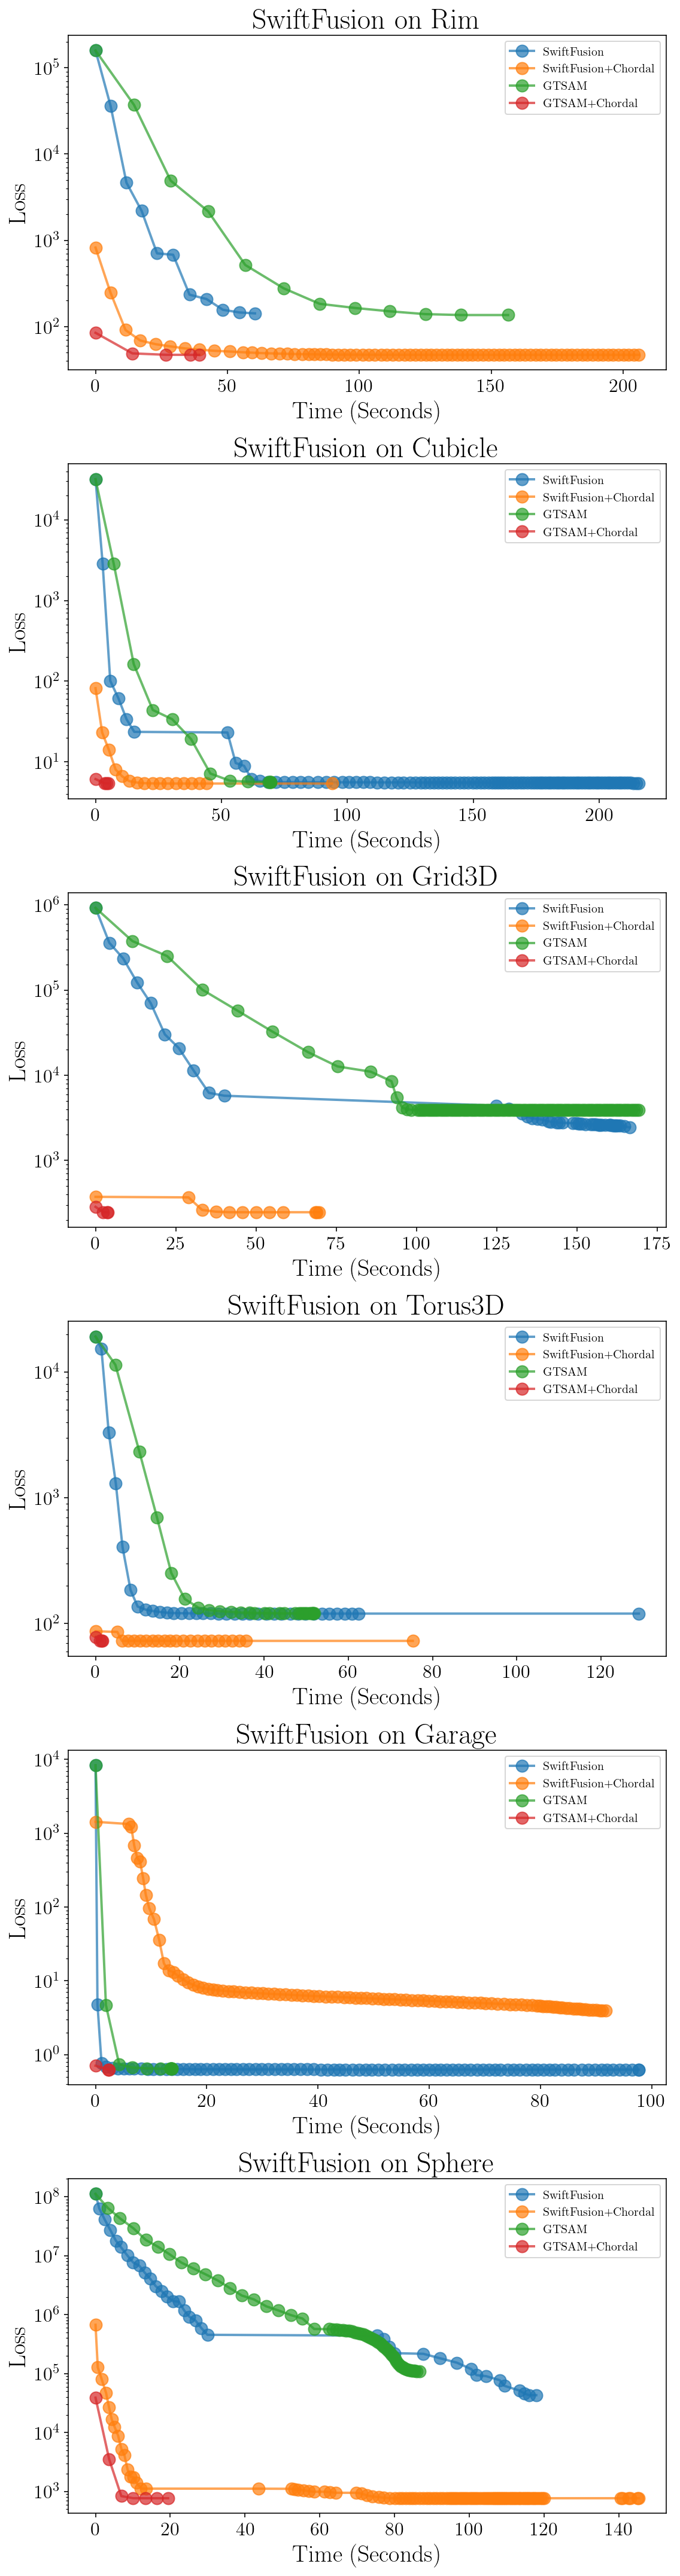

In [17]:
fig, axs = plt.subplots(6, figsize=(8, 30))

for i in range(6):
    ax = axs[i]
    plot_dataset(ax, datasets[i])
    ax.set_yscale("log")
    ax.legend()
    ax.set_title("SwiftFusion on " + dataset_names[datasets[i]])
    ax.set_xlabel("Time (Seconds)")
    ax.set_ylabel("Loss");

fig.tight_layout()